<a href="https://colab.research.google.com/github/DataWhizAnushka/ds_assignments/blob/main/decisiontree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **DECISION TREE**

 1: Data Preparation

In [ ]:
import pandas as pd
from sklearn.datasets import load_iris

# Load dataset
data = load_iris()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

# Display the first few rows of the dataset
df.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


2: Exploratory Data Analysis (EDA)

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
dtype: int64
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)      target  
count        150.000000  150.000000  
mean           1.199333    1.000000  
std            0.762238    0.819232  
min            0.100000    0.000000  
25%            0.300000    0.000000  
50%            1.300000    1.000000  
75%            1.800

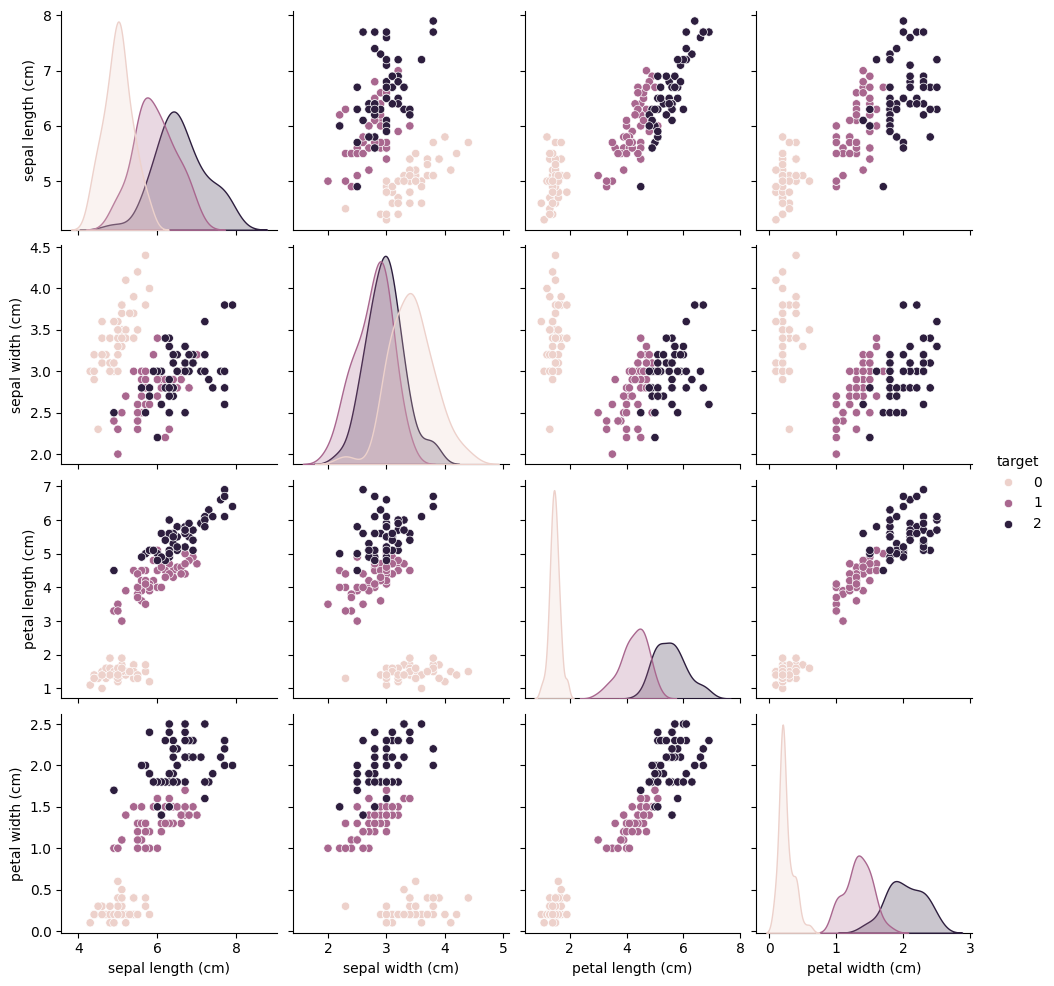

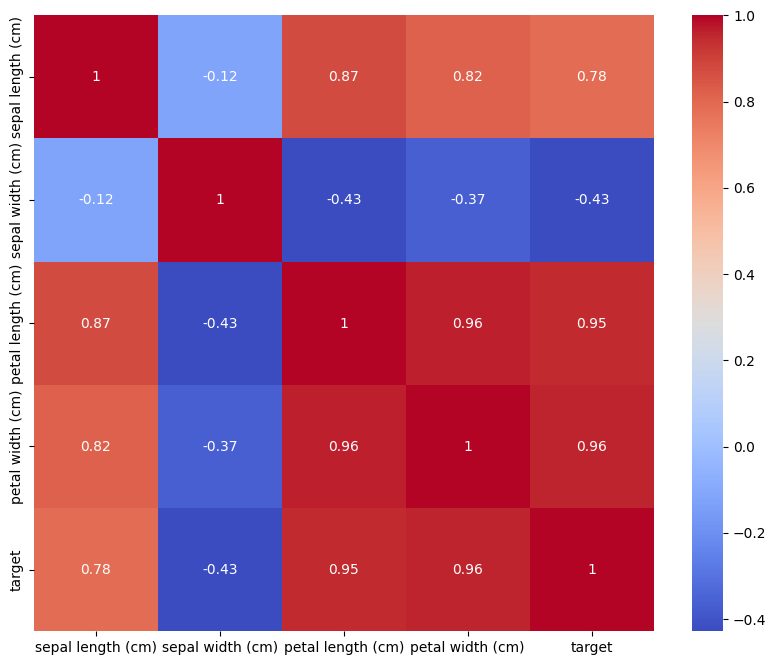

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Check for missing values
print(df.isnull().sum())

# Summary statistics
print(df.describe())

# Visualize distribution of features
sns.pairplot(df, hue='target')
plt.show()

# Correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()


3: Feature Engineering

In [ ]:
from sklearn.preprocessing import StandardScaler

# Encoding categorical variables (if any)
# df = pd.get_dummies(df, columns=['categorical_feature'])

# Scaling numerical features
scaler = StandardScaler()
df[data.feature_names] = scaler.fit_transform(df[data.feature_names])

df.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,-0.900681,1.019004,-1.340227,-1.315444,0
1,-1.143017,-0.131979,-1.340227,-1.315444,0
2,-1.385353,0.328414,-1.397064,-1.315444,0
3,-1.506521,0.098217,-1.283389,-1.315444,0
4,-1.021849,1.249201,-1.340227,-1.315444,0


4: Decision Tree Classification

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score

# Split the dataset
X = df.drop('target', axis=1)
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


5: Hyperparameter Tuning

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define hyperparameters
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 10, 20],
    'min_samples_leaf': [1, 5, 10]
}

# Grid search
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Best parameters
print("Best parameters:", grid_search.best_params_)

# Evaluate the tuned model
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test)

print("Accuracy after tuning:", accuracy_score(y_test, y_pred_best))
print("Classification Report after tuning:\n", classification_report(y_test, y_pred_best))
print("Confusion Matrix after tuning:\n", confusion_matrix(y_test, y_pred_best))


Best parameters: {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Accuracy after tuning: 1.0
Classification Report after tuning:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Confusion Matrix after tuning:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


 6: Model Evaluation and Analysis

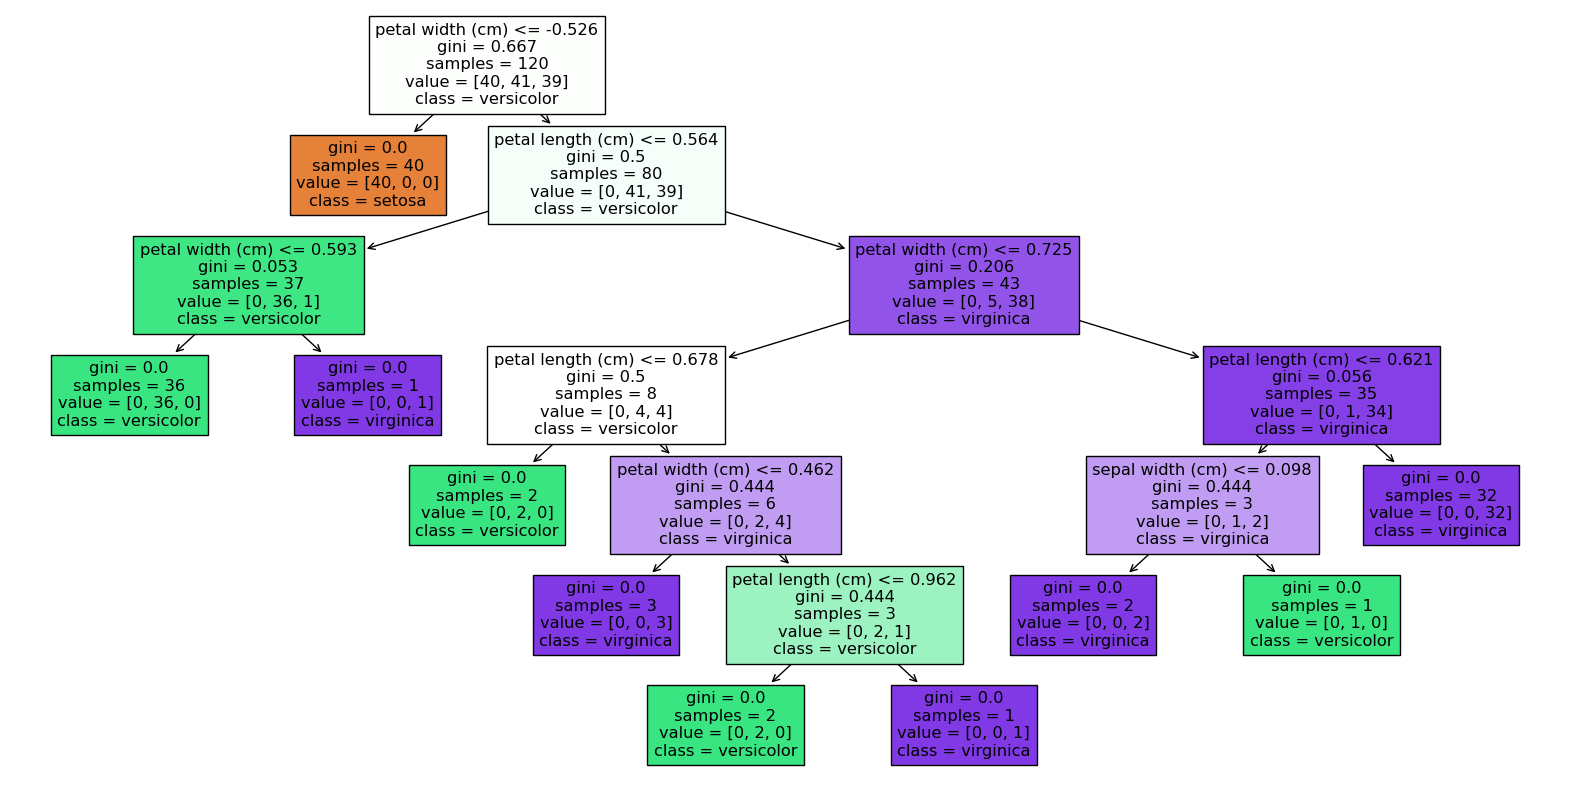

In [ ]:
from sklearn.tree import plot_tree

# Visualize the decision tree
plt.figure(figsize=(20, 10))
plot_tree(best_model, feature_names=data.feature_names, class_names=data.target_names, filled=True)
plt.show()


 6: Model Evaluation and Analysis

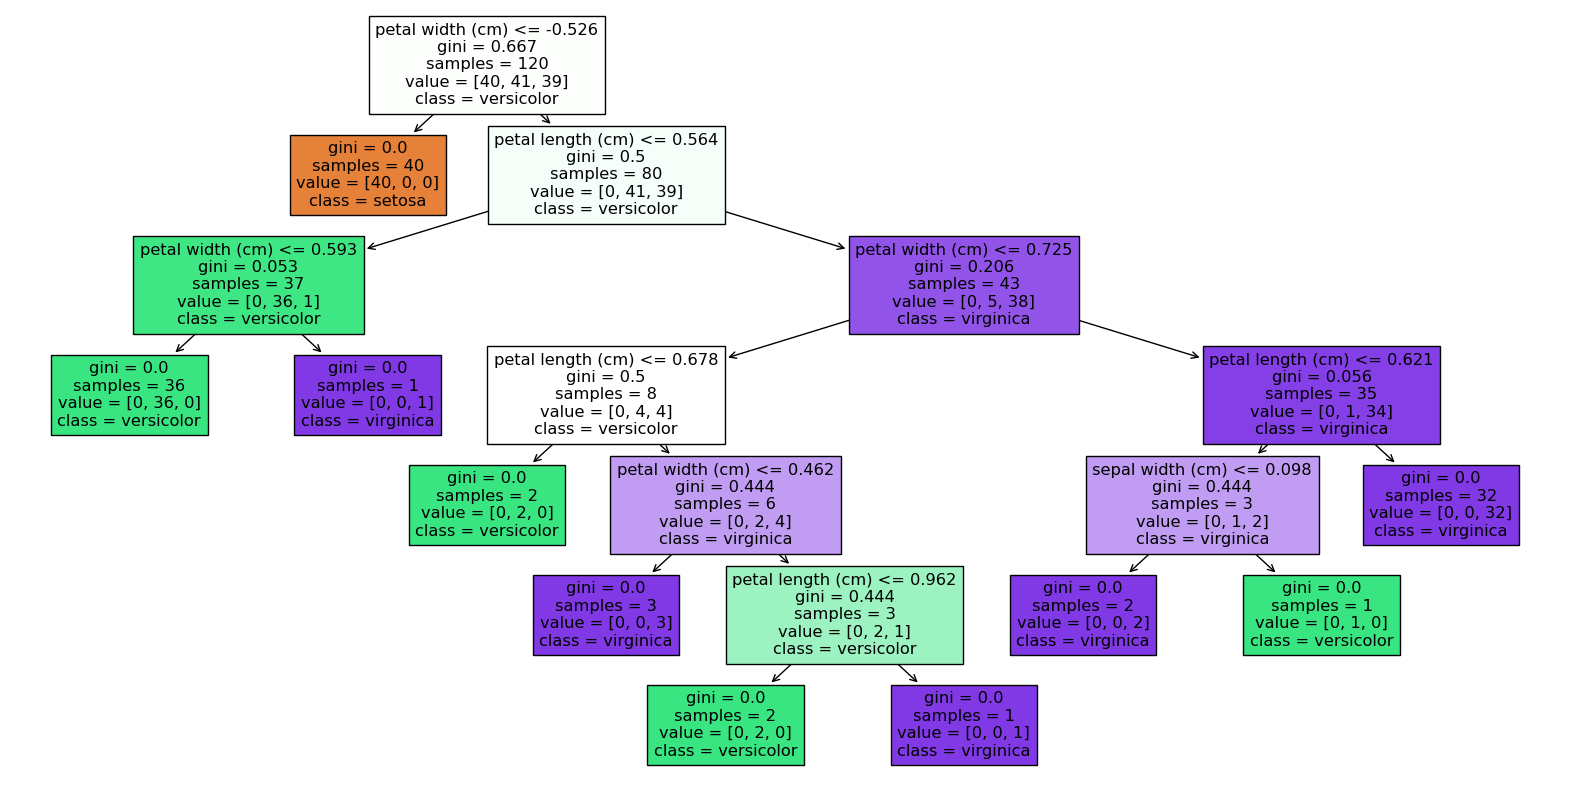

In [ ]:
from sklearn.tree import plot_tree

# Visualize the decision tree
plt.figure(figsize=(20, 10))
plot_tree(best_model, feature_names=data.feature_names, class_names=data.target_names, filled=True)
plt.show()


INTERVIEW QUESTION:


1. Common hyperparameters of decision tree models:

- criterion: The function to measure the quality of a split. Common options are 'gini' for the Gini impurity and 'entropy' for the information gain.
- max_depth: The maximum depth of the tree. Limiting the depth of the tree helps prevent overfitting.
- min_samples_split: The minimum number of samples required to split an internal node. Increasing this value can result in a more generalized model.
- min_samples_leaf: The minimum number of samples required to be at a leaf node. This helps smooth the model, especially in regression.
- max_features: The number of features to consider when looking for the best split. Reducing this can help reduce overfitting.

2.Difference between Label encoding and One-hot encoding:

- Label Encoding: Converts categorical values into numerical values (e.g., 'red' becomes 0, 'green' becomes 1, 'blue' becomes 2). This approach may introduce an ordinal relationship where none exists.
- One-Hot Encoding: Converts categorical values into binary vectors (e.g., 'red' becomes [1, 0, 0], 'green' becomes [0, 1, 0], 'blue' becomes [0, 0, 1]). This approach avoids introducing an ordinal relationship and is suitable for categorical variables without inherent order.